# Census Report
## Texas state wide income report
I will be using the income data from the Texas census report so in future reference I can see if there is a correlation between income level and number of gun related incidents

First I will import the libraries needed to generate visualizations for spatial data

In [3]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

These libraries help read the data and allow us to visualize geo related data

Next I will load the data file. It's located in the in the main page so it does not need any other directory.

In [4]:
inc = gpd.read_file('acs2019_5yr_B19001_05000US48191.geojson')

Geopandas will be used to process the data in order to make geo spatial visualizations

## First look at the data
Now we will look at the basics of the data: the amount of information in the file

In [5]:
inc.shape

(256, 37)

There are 256 rows and 37 columns

In [6]:
inc.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,01000US,United States,120756048.0,236892.0,7302871.0,18046.0,5189583.0,15224.0,5300624.0,15337.0,...,51444.0,11019036.0,49867.0,7267775.0,40108.0,8173563.0,49077.0,9264390.0,54033.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US48,Texas,9691647.0,18858.0,593067.0,6163.0,388668.0,4911.0,416958.0,4312.0,...,8492.0,875978.0,8091.0,578591.0,6503.0,645429.0,6967.0,718723.0,6426.0,"MULTIPOLYGON (((-103.98018 32.00012, -103.9799..."
2,05000US48001,"Anderson County, TX",16677.0,414.0,861.0,226.0,1302.0,276.0,1259.0,232.0,...,277.0,943.0,203.0,574.0,202.0,411.0,127.0,242.0,83.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
3,05000US48003,"Andrews County, TX",5573.0,191.0,272.0,106.0,188.0,86.0,146.0,85.0,...,238.0,573.0,177.0,473.0,170.0,401.0,141.0,425.0,112.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
4,05000US48005,"Angelina County, TX",31035.0,619.0,2102.0,314.0,1738.0,297.0,1890.0,334.0,...,541.0,2283.0,308.0,1068.0,268.0,1203.0,209.0,688.0,169.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."


The output of .head produces the first 5 rows of the data as a sample of its layout

Next we will take a look at the data types using .info

In [7]:
inc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             256 non-null    object  
 1   name              256 non-null    object  
 2   B19001001         256 non-null    float64 
 3   B19001001, Error  256 non-null    float64 
 4   B19001002         256 non-null    float64 
 5   B19001002, Error  256 non-null    float64 
 6   B19001003         256 non-null    float64 
 7   B19001003, Error  256 non-null    float64 
 8   B19001004         256 non-null    float64 
 9   B19001004, Error  256 non-null    float64 
 10  B19001005         256 non-null    float64 
 11  B19001005, Error  256 non-null    float64 
 12  B19001006         256 non-null    float64 
 13  B19001006, Error  256 non-null    float64 
 14  B19001007         256 non-null    float64 
 15  B19001007, Error  256 non-null    float64 
 16  B19001008         

## Cleaning the data 
Not everything in this data set is useful so in order to avoid skewed results I will omit some of the unecessary data. 

To understand the geo spatial aspect of this data we will use .plot to visualize the numerical values of the data set in a map like way

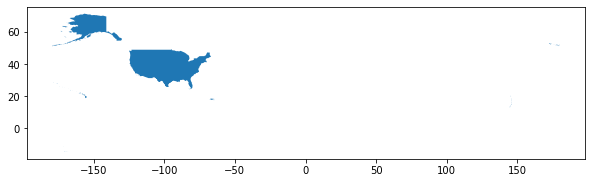

In [8]:
inc.plot(figsize=(10,20))

This .plot produced a visualization that looks like the united states however I only want to see the state of texas's income. In this case I will use .drop to deop the first row starting at 0.

In [9]:
inc = inc.drop([0])


In [10]:
inc.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
1,04000US48,Texas,9691647.0,18858.0,593067.0,6163.0,388668.0,4911.0,416958.0,4312.0,...,8492.0,875978.0,8091.0,578591.0,6503.0,645429.0,6967.0,718723.0,6426.0,"MULTIPOLYGON (((-103.98018 32.00012, -103.9799..."
2,05000US48001,"Anderson County, TX",16677.0,414.0,861.0,226.0,1302.0,276.0,1259.0,232.0,...,277.0,943.0,203.0,574.0,202.0,411.0,127.0,242.0,83.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
3,05000US48003,"Andrews County, TX",5573.0,191.0,272.0,106.0,188.0,86.0,146.0,85.0,...,238.0,573.0,177.0,473.0,170.0,401.0,141.0,425.0,112.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
4,05000US48005,"Angelina County, TX",31035.0,619.0,2102.0,314.0,1738.0,297.0,1890.0,334.0,...,541.0,2283.0,308.0,1068.0,268.0,1203.0,209.0,688.0,169.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
5,05000US48007,"Aransas County, TX",9548.0,501.0,854.0,290.0,557.0,181.0,450.0,153.0,...,237.0,731.0,178.0,345.0,180.0,379.0,130.0,581.0,209.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."


After running .head again I can see the united states row was dropped from the chart. Now i will run .plot again to see if it will produce a visualization that looks like the state of texas.

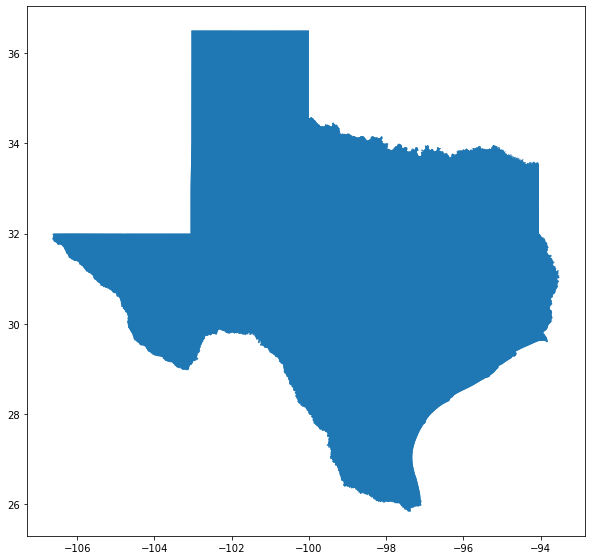

In [11]:
inc.plot(figsize=(10,10))

The drop was successful but I want to look more specifically at the counties within texas so I will also omit the row that contains the income averages for the entire state of texas. This time i will drop row 1 because it is technically the second row if we start at 0.

In [12]:
inc = inc.drop([1])
inc.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
2,05000US48001,"Anderson County, TX",16677.0,414.0,861.0,226.0,1302.0,276.0,1259.0,232.0,...,277.0,943.0,203.0,574.0,202.0,411.0,127.0,242.0,83.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
3,05000US48003,"Andrews County, TX",5573.0,191.0,272.0,106.0,188.0,86.0,146.0,85.0,...,238.0,573.0,177.0,473.0,170.0,401.0,141.0,425.0,112.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
4,05000US48005,"Angelina County, TX",31035.0,619.0,2102.0,314.0,1738.0,297.0,1890.0,334.0,...,541.0,2283.0,308.0,1068.0,268.0,1203.0,209.0,688.0,169.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
5,05000US48007,"Aransas County, TX",9548.0,501.0,854.0,290.0,557.0,181.0,450.0,153.0,...,237.0,731.0,178.0,345.0,180.0,379.0,130.0,581.0,209.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
6,05000US48009,"Archer County, TX",3452.0,114.0,158.0,52.0,209.0,88.0,169.0,51.0,...,77.0,359.0,89.0,240.0,62.0,208.0,62.0,207.0,70.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


Once again will we test the drop using .plot

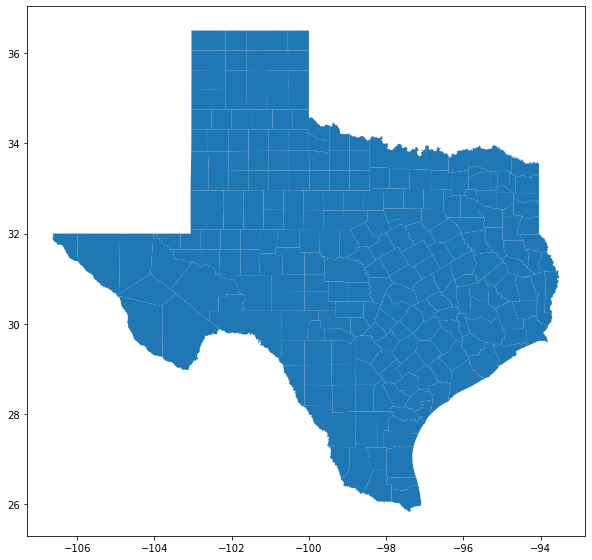

In [13]:
inc.plot(figsize=(10,10))

Yay it was successful so now i can look at the data without any enormous outliers

## Making the data legible
Now I will use techniques to change the numerical values into readable variables.

In [14]:
list(inc)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

List allows use to make a list out of all the columns in our data set, I will now go through and clean the error messages.

In [15]:
columns_to_keep = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

Now I will redefine the inc variable to accomodate the columns I want to keep

In [16]:
inc = inc[columns_to_keep]

I will now test it using .head to see if the data was properly cleaned 

In [17]:
inc.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
2,05000US48001,"Anderson County, TX",16677.0,861.0,1302.0,1259.0,1118.0,897.0,1218.0,1171.0,814.0,734.0,1588.0,1714.0,1831.0,943.0,574.0,411.0,242.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
3,05000US48003,"Andrews County, TX",5573.0,272.0,188.0,146.0,114.0,293.0,212.0,165.0,355.0,125.0,332.0,496.0,1003.0,573.0,473.0,401.0,425.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
4,05000US48005,"Angelina County, TX",31035.0,2102.0,1738.0,1890.0,1915.0,2381.0,1466.0,1336.0,1206.0,1358.0,2980.0,3215.0,4206.0,2283.0,1068.0,1203.0,688.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
5,05000US48007,"Aransas County, TX",9548.0,854.0,557.0,450.0,578.0,666.0,550.0,677.0,425.0,474.0,589.0,707.0,985.0,731.0,345.0,379.0,581.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
6,05000US48009,"Archer County, TX",3452.0,158.0,209.0,169.0,184.0,166.0,196.0,124.0,93.0,125.0,196.0,376.0,442.0,359.0,240.0,208.0,207.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


I'll restate the list so I can relable it with the none numerical names

In [18]:
list(inc)

['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

Now I will use .columns to create a list of names for the columns

In [19]:
inc.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '10,000 to $14,999',
 '15,000 to $19,999',
 '20,000 to $24,999',
 '25,000 to $29,999',
 '30,000 to $34,999',
 '35,000 to $39,999',
               '40,000 to $44,999',
 '45,000 to $49,999',

'50,000 to $59,999',
 '60,000 to $74,999',
 '75,000 to $99,999',
 '100,000 to $124,999',
 '$125,000 to $149,999',
                '150,000 to $199,999',
 '$200,000 or more',
 'geometry']

Now to test to see if the labeled the columns correctly

In [20]:
inc.head()

,geoid,name,Total,"Less than $10,000","10,000 to $14,999","15,000 to $19,999","20,000 to $24,999","25,000 to $29,999","30,000 to $34,999","35,000 to $39,999","40,000 to $44,999","45,000 to $49,999","50,000 to $59,999","60,000 to $74,999","75,000 to $99,999","100,000 to $124,999","$125,000 to $149,999","150,000 to $199,999","$200,000 or more",geometry
2,05000US48001,"Anderson County, TX",16677.0,861.0,1302.0,1259.0,1118.0,897.0,1218.0,1171.0,814.0,734.0,1588.0,1714.0,1831.0,943.0,574.0,411.0,242.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
3,05000US48003,"Andrews County, TX",5573.0,272.0,188.0,146.0,114.0,293.0,212.0,165.0,355.0,125.0,332.0,496.0,1003.0,573.0,473.0,401.0,425.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
4,05000US48005,"Angelina County, TX",31035.0,2102.0,1738.0,1890.0,1915.0,2381.0,1466.0,1336.0,1206.0,1358.0,2980.0,3215.0,4206.0,2283.0,1068.0,1203.0,688.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
5,05000US48007,"Aransas County, TX",9548.0,854.0,557.0,450.0,578.0,666.0,550.0,677.0,425.0,474.0,589.0,707.0,985.0,731.0,345.0,379.0,581.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
6,05000US48009,"Archer County, TX",3452.0,158.0,209.0,169.0,184.0,166.0,196.0,124.0,93.0,125.0,196.0,376.0,442.0,359.0,240.0,208.0,207.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


## Simple Histograms
I will now show the mean and median of the data per column

the total mean 

In [21]:
inc['Total'].mean()

38156.0905511811

The total mean is 547419.3046875

The total median

In [22]:
inc['Total'].median()

6443.5

I will now plot the number of people who make less than $10,000 annually on a histogram, I adjusted the number of bins inorder to make the bars more legible

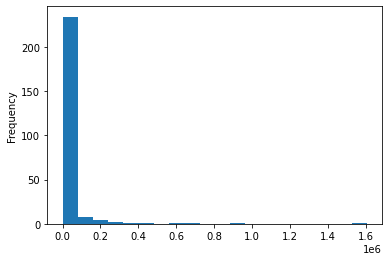

In [23]:
inc['Total'].plot.hist(bins=20)

I will now plot the number of people who make between 75,000 to 99,999 on a histogram, I adjusted the number of bins inorder to make the bars more legible

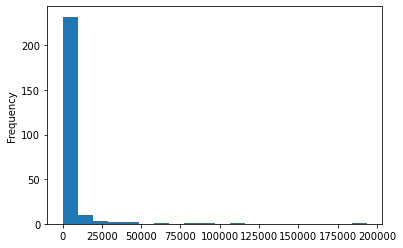

In [24]:
inc['75,000 to $99,999'].plot.hist(bins=20)

I will now over lap the Less than 10,000 values and the 200,000 or more to see the discrepancies using similar code to the two columned maps. This way you can visibly see the magnitude of difference between both categories.

Text(0.5, 1.0, 'orange = 200,000 or more dollars, blue = Less than 10,000 dollars')

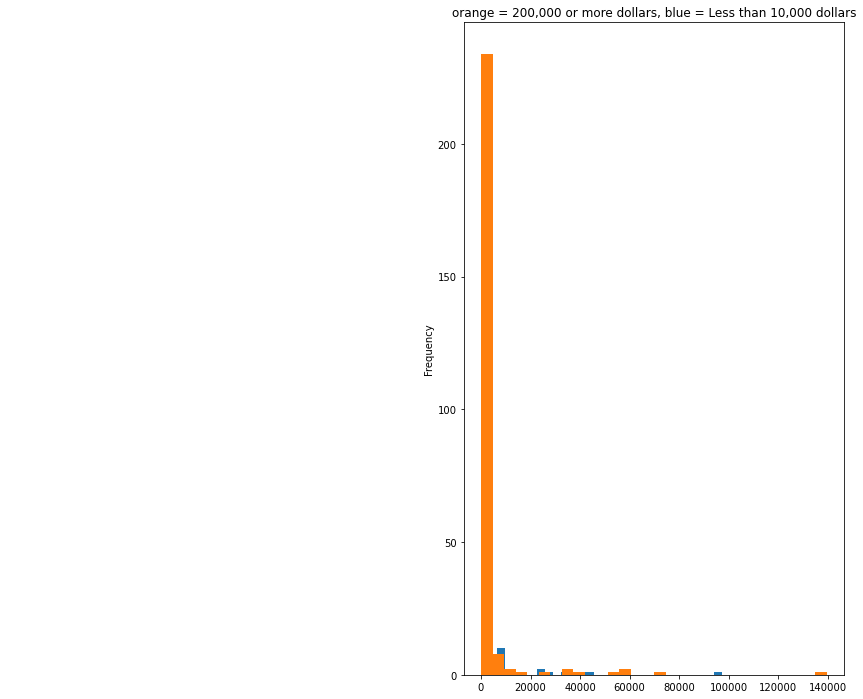

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

inc['Less than $10,000'].plot.hist(bins=30)
ax1.axis("off")

inc['$200,000 or more'].plot.hist(bins=30)

ax2.axis("on")
ax2.set_title("orange = 200,000 or more dollars, blue = Less than 10,000 dollars")

This chart shows very well the percentage of people making over under 10,000 is smaller than those making more than 200,000

## Filtering the data
Now we will go through and analyze the categories as percentages of the total Texas income.

In [26]:
list(inc)

['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '10,000 to $14,999',
 '15,000 to $19,999',
 '20,000 to $24,999',
 '25,000 to $29,999',
 '30,000 to $34,999',
 '35,000 to $39,999',
 '40,000 to $44,999',
 '45,000 to $49,999',
 '50,000 to $59,999',
 '60,000 to $74,999',
 '75,000 to $99,999',
 '100,000 to $124,999',
 '$125,000 to $149,999',
 '150,000 to $199,999',
 '$200,000 or more',
 'geometry']

I restate the list so I can take each column and create a percentage out of it.

In [27]:
inc['Percent Less than $10,000'] = inc['Less than $10,000']/inc['Total']*100
inc['Percent 10,000 to $14,999'] = inc['10,000 to $14,999']/inc['Total']*100
inc['Percent 15,000 to $19,999'] = inc['15,000 to $19,999']/inc['Total']*100
inc['Percent 20,000 to $24,999'] = inc['20,000 to $24,999']/inc['Total']*100 
inc['Percent 30,000 to $34,999'] = inc['30,000 to $34,999']/inc['Total']*100
inc['Percent 35,000 to $39,999'] = inc['35,000 to $39,999']/inc['Total']*100
inc['Percent 40,000 to $44,999'] = inc['40,000 to $44,999']/inc['Total']*100 
inc['Percent 45,000 to $49,999'] = inc['45,000 to $49,999']/inc['Total']*100
inc['Percent 50,000 to $59,999'] = inc['50,000 to $59,999']/inc['Total']*100
inc['Percent 60,000 to $74,999'] = inc['60,000 to $74,999']/inc['Total']*100
inc['Percent 75,000 to $99,999'] = inc['75,000 to $99,999']/inc['Total']*100 
inc['Percent 100,000 to $124,999'] = inc['100,000 to $124,999']/inc['Total']*100
inc['Percent $125,000 to $149,999'] = inc['$125,000 to $149,999']/inc['Total']*100 
inc['Percent 150,000 to $199,999'] = inc['150,000 to $199,999']/inc['Total']*100
inc['Percent $200,000 or more'] = inc['$200,000 or more']/inc['Total']*100 

I will now map the percentages by the variables I created above, i made the legend visible and i added a scheme.

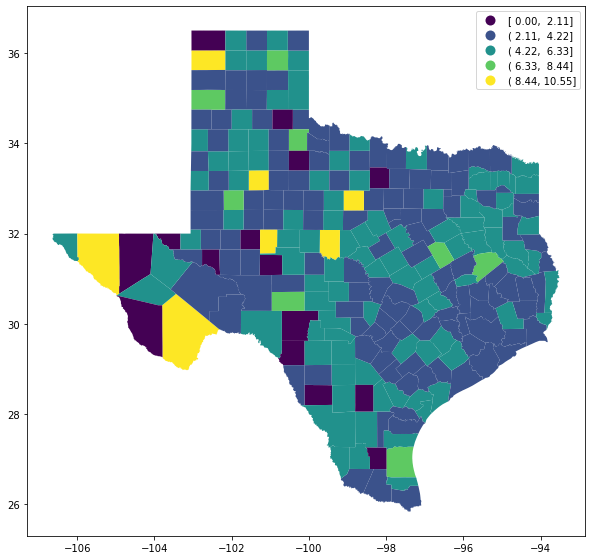

In [31]:
inc.plot(figsize=(10,30),
                 column='Percent 45,000 to $49,999',
                 legend=True, 
                 scheme='equal_interval')

This map shows percentage of people in each county that has an income between 45,000 and 49,000, the highest percentage being colored yellow. I will now create a maps side by side that compare the lowest and highest incomes by county.

Text(0.5, 1.0, 'Percent $200,000 or more')

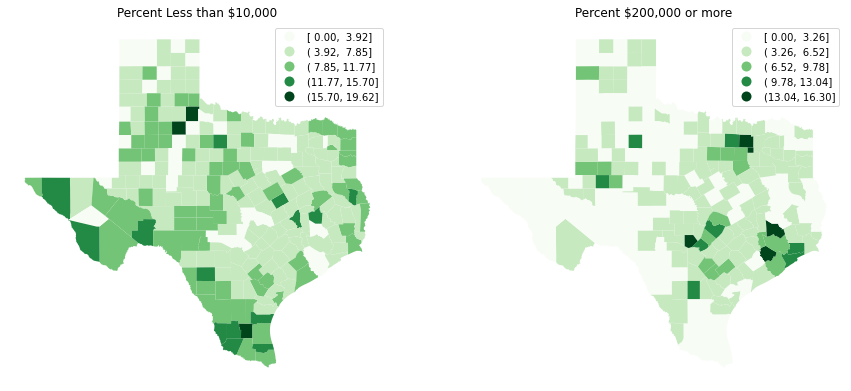

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs

inc.plot(column='Percent Less than $10,000', 
         
            cmap= 'Greens', 
            scheme='equal_interval',
            k=5, 
            edgecolor='blue', 
            linewidth=0., 
            alpha=1, 
            ax=ax1, 
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Less than $10,000")

inc.plot(column='Percent $200,000 or more', 
            cmap= 'Greens', 
            scheme='equal_interval',
            k=5, 
            edgecolor='blue', 
            linewidth=0., 
            alpha=1, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent $200,000 or more")

There is a higher percentage of income less than 10,000 across the state than there is people making over 200,000

I analyzed income in the Texas census and Stacy analyzed education, both of which are factors in gun related incidents.